In [1]:
import numpy as np
from matplotlib import pyplot as plt
import torch
from torch.utils.data import DataLoader, random_split
from torchvision import transforms
from Utils.preprocessing import EcgDataset, ToTensor


transform = transforms.Compose([
    ToTensor(),
    transforms.Resize([128, 128])
    # transforms.Normalize(mean=[0.5], std=[0.5])
])

train_data = EcgDataset(
    root_dir="Data/training_data/dataset",
    transform=transform
)

val_data = EcgDataset(
    root_dir="Data/validation_data/dataset",
    transform=transform
)

# train_data, val_data = random_split(dataset, [0.8,0.2])

train_loader = DataLoader(
    train_data,
    batch_size=32,
    shuffle=True,
    pin_memory=True
)
val_loader = DataLoader(
    val_data,
    batch_size=64,
    shuffle=True,
    pin_memory=True
)

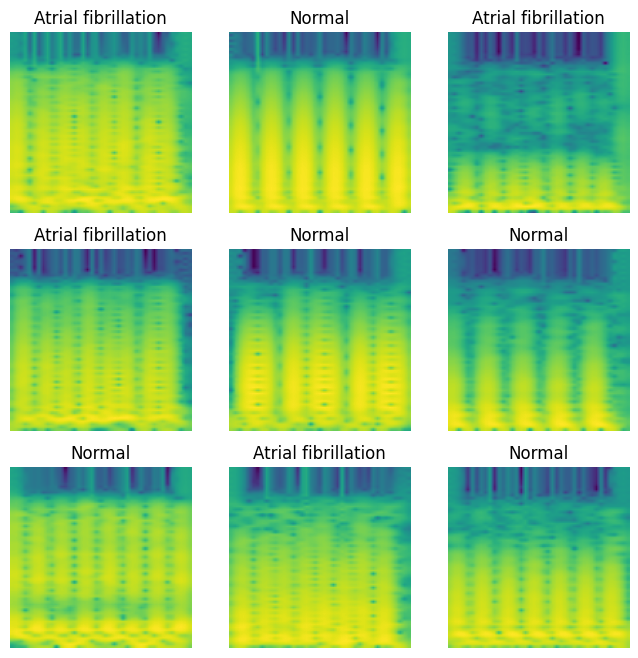

In [2]:
labels_map = {
    0: "Normal",
    1: "Atrial fibrillation"
}

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_data), size=(1,)).item()
    img, label = train_data[sample_idx]
    # print(sample_idx)
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="viridis")
plt.show()

In [3]:
from torchsummary import summary
from Network.afib_detector_v4_0 import AfibDetector

net = AfibDetector()

if torch.cuda.is_available():
    net.cuda()

summary(net, (1,128,128))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 64, 64]              80
              ReLU-2            [-1, 8, 64, 64]               0
       BatchNorm2d-3            [-1, 8, 64, 64]              16
         MaxPool2d-4            [-1, 8, 32, 32]               0
       BatchNorm2d-5            [-1, 8, 32, 32]              16
            Conv2d-6           [-1, 16, 32, 32]           1,168
              ReLU-7           [-1, 16, 32, 32]               0
         Dropout2d-8           [-1, 16, 32, 32]               0
       BatchNorm2d-9           [-1, 16, 32, 32]              32
        MaxPool2d-10           [-1, 16, 16, 16]               0
      BatchNorm2d-11           [-1, 16, 16, 16]              32
           Conv2d-12           [-1, 32, 16, 16]           4,640
             ReLU-13           [-1, 32, 16, 16]               0
      BatchNorm2d-14           [-1, 32,

In [4]:
import torch.nn as nn
from torch import optim
from Utils.model_trainer import ModelTrainer
import os

MODEL_PATH = "./Models/afib_detector_v4_1_1/afib_detector_v4_1_1"
if not os.path.exists(os.path.dirname(MODEL_PATH)):
        os.makedirs(os.path.dirname(MODEL_PATH))

learning_rate = 0.00005

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=learning_rate)

# scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=2, gamma=0.5)

epochs = 8
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print("Device:", device)

net.to(device)

modelTrainer = ModelTrainer(MODEL_PATH)

modelTrainer.train_model(
    net,
    train_loader,
    val_loader,
    loss_fn,
    optimizer,
    device,
    epochs
)

Device: cuda:0
EPOCH 1:
	batch 4068 loss: 0.6268741850875823
	batch 8136 loss: 0.49167852938512197
	batch 12204 loss: 0.42875213757699454
	batch 16272 loss: 0.38331880132349955
	batch 20340 loss: 0.3481834985081366
LOSS train 0.3481834985081366 valid 0.6424397829949924 ACCURACY 0.722947359085083
EPOCH 2:
	batch 4068 loss: 0.32119771726649243
	batch 8136 loss: 0.29991117400193223
	batch 12204 loss: 0.2831507167195573
	batch 16272 loss: 0.2655349410923826
	batch 20340 loss: 0.2537164202989276
LOSS train 0.2537164202989276 valid 0.6293131030353484 ACCURACY 0.7701955437660217
EPOCH 3:
	batch 4068 loss: 0.24301398724625245
	batch 8136 loss: 0.23819646764374472
	batch 12204 loss: 0.22930896938609047
	batch 16272 loss: 0.22353422832872166
	batch 20340 loss: 0.21284476699968735
LOSS train 0.21284476699968735 valid 0.6410757800028632 ACCURACY 0.803818941116333
EPOCH 4:
	batch 4068 loss: 0.21069788037741607
	batch 8136 loss: 0.20753762709762583
	batch 12204 loss: 0.20126872400697338
	batch 16272

In [5]:
epochs = 8

modelTrainer.train_model(
    net,
    train_loader,
    val_loader,
    loss_fn,
    optimizer,
    device,
    epochs
)

EPOCH 1:
	batch 4068 loss: 0.15392326722548855
	batch 8136 loss: 0.15309738888036215
	batch 12204 loss: 0.15339373146420054
	batch 16272 loss: 0.15186418565502985
	batch 20340 loss: 0.14929778509129538
LOSS train 0.14929778509129538 valid 0.5924332864403316 ACCURACY 0.828687310218811
EPOCH 2:
	batch 4068 loss: 0.1504138028702443
	batch 8136 loss: 0.14711812117082984
	batch 12204 loss: 0.14825912998465413
	batch 16272 loss: 0.14789139349132616
	batch 20340 loss: 0.14683954138194294
LOSS train 0.14683954138194294 valid 0.6804609755171465 ACCURACY 0.8222061395645142
EPOCH 3:
	batch 4068 loss: 0.1439289496675859
	batch 8136 loss: 0.14470682088345208
	batch 12204 loss: 0.14430301102206125
	batch 16272 loss: 0.14113861512834153
	batch 20340 loss: 0.14079653338351514
LOSS train 0.14079653338351514 valid 0.654367324745737 ACCURACY 0.8214004635810852
EPOCH 4:
	batch 4068 loss: 0.14017499168220296
	batch 8136 loss: 0.1385817226219827
	batch 12204 loss: 0.14077270368682798
	batch 16272 loss: 0.13